# Assignment 2 2AMM10 2023-2024

## Group: LuBrieThak
### Member 1: Gianuzzo Gabriele
### Member 2: Ferrara Luigi
### Member 3: Goswami Sarthak

We need to install some specific libraries. The cell below installs torch_geometric for torch 2.6.0+cu124. In case the current version of torch is different, check [here](https://pytorch-geometric.readthedocs.io/en/latest/install/installation.html) to see which versions (of both libraries) you should install. You might also need to install an old version of torch from [here](https://pytorch.org/get-started/previous-versions/)

**Note:** Do not install pyg_lib from the optional dependencies

In [1]:
!pip show torch

Name: torch
Version: 2.7.0+cu128
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3-Clause
Location: C:\Users\Yosar\AppData\Local\Programs\Python\Python313\Lib\site-packages
Requires: filelock, fsspec, jinja2, networkx, setuptools, sympy, typing-extensions
Required-by: stable_baselines3, torchaudio, torchvision


In [2]:
!pip install rdkit
!pip install torch_geometric
!pip install torch_scatter torch_sparse torch_cluster torch_spline_conv -f https://data.pyg.org/whl/torch-2.6.0+cu124.html

Looking in links: https://data.pyg.org/whl/torch-2.6.0+cu124.html
  Using cached torch_scatter-2.1.2.tar.gz (108 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [23 lines of output]
      Traceback (most recent call last):
        File "C:\Users\Yosar\AppData\Local\Programs\Python\Python313\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 389, in <module>
          main()
          ~~~~^^
        File "C:\Users\Yosar\AppData\Local\Programs\Python\Python313\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 373, in main
          json_out["return_val"] = hook(**hook_input["kwargs"])
                                   ~~~~^^^^^^^^^^^^^^^^^^^^^^^^
        File "C:\Users\Yosar\AppData\Local\Programs\Python\Python313\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 143, in get_requires_for_build_wheel
          return hook(config_settings)
        File "C:\Users\Yosar\AppData\Local\Temp\pip-build-env-5daiqt29\overlay\Lib\site-packa

In [24]:
import pickle
import numpy as np
from rdkit import Chem
from rdkit.Chem import Draw, AllChem
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*')
import matplotlib.pyplot as plt

In [25]:
with open('pos_data.pkl', 'rb') as f:
    pos_data = pickle.load(f)

with open('type_data.pkl', 'rb') as f:
    type_data = pickle.load(f)

with open('smiles.pkl', 'rb') as f:
    smiles_data = pickle.load(f)

data_split = np.load('data_split.npz')

train_idxes = data_split['train_idx']
test_idxes = data_split['test_idx']

formation_energy = np.load('formation_energy.npz')

fe = formation_energy['y'] # normalized formation energy
mu = formation_energy['mu']
std = formation_energy['sigma']

print(len(fe))

129012


In [26]:
# shapes of lists
print("Length of data")
print(f"pos_data: {len(pos_data)}, type_data: {len(type_data)}, smiles: {len(smiles_data)}")
print("Idxes")
print(f"train: {len(train_idxes)}, test: {len(test_idxes)}, sum: {len(train_idxes) + len(test_idxes)}")

Length of data
pos_data: 129012, type_data: 129012, smiles: 129012
Idxes
train: 119012, test: 10000, sum: 129012


In [27]:
def at_number_to_atom_name(at_number):
    if at_number == 6:
        return 'C'
    elif at_number == 1:
        return 'H'
    elif at_number == 7:
        return 'N'
    elif at_number == 8:
        return 'O'
    elif at_number == 9:
        return 'F'
    elif at_number == 16:
        return 'S'
    else:
        return 'Unknown'

def inspect_structure(idx):
    smile = smiles_data[idx]
    pos = pos_data[idx]
    typ = type_data[idx]

    header = f"{'Atom':^5}│{'Number':^6}│{'x':^10}│{'y':^10}│{'z':^10}"
    line   = "─────┼──────┼──────────┼──────────┼──────────"
    print(header)
    print(line)

    for atom_num, (x, y, z) in zip(typ, pos):
        atom_sym = at_number_to_atom_name(atom_num)
        print(f"{atom_sym:^5}│{atom_num:^6}│{x:>10.3f}│{y:>10.3f}│{z:>10.3f}")
    print("")
    print("")
    print(f'SMILE: {smile}')
    print("")
    print("")
    print(f'Formation Energy: {fe[idx]*std + mu:.3f}')
    print(f'Formation Energy (normalized): {fe[idx]:.5f}')
    mol = Chem.MolFromSmiles(smile)
    if mol:
        # RDKit prefers 2‑D coordinates for nice depictions
        Chem.AllChem.Compute2DCoords(mol)
        img = Draw.MolToImage(mol, size=(300, 300))

        # Display with matplotlib (works both in notebooks and scripts)
        plt.figure(figsize=(3, 3))
        plt.axis('off')
        plt.imshow(img)
        plt.show()

Atom │Number│    x     │    y     │    z     
─────┼──────┼──────────┼──────────┼──────────
  C  │  6   │    -0.013│     1.086│     0.008
  H  │  1   │     0.002│    -0.006│     0.002
  H  │  1   │     1.012│     1.464│     0.000
  H  │  1   │    -0.541│     1.447│    -0.877
  H  │  1   │    -0.524│     1.438│     0.906


SMILE: C


Formation Energy: -17.172
Formation Energy (normalized): 5.72327


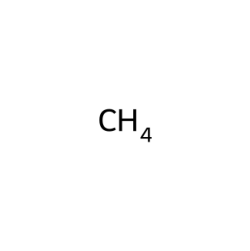

In [28]:
# methane
# Note how methane has a relatively high formation energy (compared to QM9)
# This correlates with lower thermodynamic stability and higher reactivity
# For example, methane readily burns in oxygen (CH₄ + 2O₂ → CO₂ + 2H₂O)
inspect_structure(0)

Atom │Number│    x     │    y     │    z     
─────┼──────┼──────────┼──────────┼──────────
  O  │  8   │     0.140│     0.179│    -0.457
  C  │  6   │     0.151│     1.321│    -0.140
  O  │  8   │    -0.953│     2.161│     0.053
  C  │  6   │    -0.066│     3.319│     0.098
  C  │  6   │     0.788│     3.273│     1.314
  C  │  6   │     1.160│     2.433│     0.094
  O  │  8   │     2.103│     2.898│    -0.797
  C  │  6   │     1.369│     3.636│    -1.806
  C  │  6   │     0.123│     4.249│    -1.080
  H  │  1   │     1.457│     4.112│     1.478
  H  │  1   │     0.407│     2.790│     2.207
  H  │  1   │     2.048│     4.378│    -2.231
  H  │  1   │     1.050│     2.951│    -2.602
  H  │  1   │    -0.758│     4.260│    -1.724
  H  │  1   │     0.315│     5.273│    -0.749


SMILE: O=C1O[C@]23CCO[C@]12C3


Formation Energy: -66.897
Formation Energy (normalized): 0.90072


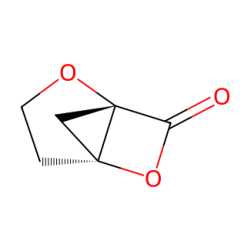

In [29]:
# random structure
inspect_structure(np.random.choice(range(len(smiles_data))))

## Task 1

In [ ]:
import pickle
import numpy as np
from rdkit import Chem
from rdkit.Chem import Draw, AllChem
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*')
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import os
import torch_geometric
from scipy.spatial.distance import pdist, squareform

from torch_geometric.data import Data, Dataset, DataLoader
from torch_geometric.nn import SAGEConv, global_mean_pool
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence
from tqdm import tqdm



'--------------------------------GNN-Model-and-Dataset-----------------------------'
class MolecularDataset(torch_geometric.data.Dataset):
    def __init__(self, pos_data, type_data, fe_data):

        self.pos_data = pos_data
        self.type_data = type_data
        self.fe_data = fe_data
        
    def __len__(self):
        return len(self.pos_data)
    
    def create_edges_distance_threshold(self, pos, threshold=2.0):
        """Create edges based on distance threshold"""
        num_atoms = len(pos)
        distances = squareform(pdist(pos))
        
        i_indices, j_indices = np.where((distances < threshold) & (distances > 0))
            
        edge_index = torch.stack([
            torch.tensor(i_indices, dtype=torch.long),
            torch.tensor(j_indices, dtype=torch.long)
        ], dim=0)
        
        edge_attr = torch.tensor(distances[i_indices, j_indices], dtype=torch.float32).unsqueeze(1)
        
        return edge_index, edge_attr
    
    def get(self, idx):
        pos = torch.tensor(self.pos_data[idx], dtype=torch.float32)
        atom_types = torch.tensor(self.type_data[idx], dtype=torch.long)
        
        x = torch.zeros((len(atom_types), 16), dtype=torch.float32)
        x.scatter_(1, (atom_types-1).unsqueeze(1), 1)
        

        edge_index, edge_attr = self.create_edges_distance_threshold(pos.numpy())
        
        return Data(x=x, pos=pos, edge_index=edge_index, edge_attr=edge_attr, 
                   y=torch.tensor([self.fe_data[idx]], dtype=torch.float32),
                   atom_types=atom_types)
    
class Node_to_emb(nn.Module):  
    def __init__(self, node_feat_dim=16, node_emb_dim=64):  
        super().__init__()
        self.emb_dim = node_emb_dim
        self.node_dim = node_feat_dim
        self.emb = nn.Linear(self.node_dim, self.emb_dim)
        

    def forward(self, nodes):
        assert nodes.size(-1) == self.node_dim, 'wrong input dimension of node features!'
        out = self.emb(nodes)
        return out
    
class MpLayer(torch.nn.Module):  
    def __init__(self, hidden_dim, activation=nn.ReLU()):
        super(MpLayer, self).__init__()
                
        self.edge_network = nn.Sequential(nn.Linear(2*hidden_dim, hidden_dim),
                                          activation,
                                          nn.Linear(hidden_dim, hidden_dim),
                                          activation
                                          )
        
        self.node_network = nn.Sequential(nn.Linear(2*hidden_dim, hidden_dim),
                                          activation,
                                          nn.Linear(hidden_dim, hidden_dim),
                                          )
        
    def forward(self, input_to_layer):
        node_tensor, edge_idx_tensor = input_to_layer
        edge_messages_input = torch.concat([node_tensor[edge_idx_tensor[0,:]], node_tensor[edge_idx_tensor[1,:]]], dim=-1)
        edge_messages_output = self.edge_network(edge_messages_input)

        
        node_agg_messages = torch.zeros(node_tensor.size(0), node_tensor.size(1)).to(node_tensor.device)
        node_agg_messages = node_agg_messages.scatter_add_(
            dim=0, index=edge_idx_tensor[1].unsqueeze(-1).expand(-1, node_tensor.size(1)), src=edge_messages_output
        )
        
        node_out = self.node_network(torch.cat([node_tensor, node_agg_messages], dim=-1))

        return node_out, edge_idx_tensor

class FormationEnergyGNN(torch.nn.Module): 
    def __init__(self, node_feat_dim, hidden_dim=64, activation=nn.ReLU(), num_layers=3):
        super(FormationEnergyGNN, self).__init__()
                
        self.node_to_emb = Node_to_emb(node_feat_dim, hidden_dim)
        self.forward_net = nn.Sequential(
            *[MpLayer(hidden_dim, activation) for i in range(num_layers)]
        )
        self.to_pred = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim),
            activation,
            nn.Linear(hidden_dim, 1)  
        )
        
    def forward(self, x, edge_index, batch):
        x = self.node_to_emb(x)
        input_model = (x, edge_index)
        output_model = self.forward_net(input_model)
        x, _ = output_model
        
        out = torch.zeros(max(batch)+1, x.size(1)).to(x.device)
        idx_aggregate_graph = batch.unsqueeze(-1).expand(-1, x.size(1))
        
        out.scatter_add_(dim=0, index=idx_aggregate_graph, src=x)  
        
        x = self.to_pred(out)
        return x.squeeze(-1)  


'------------------------------------Metrics------------------------------------'
def denormalize(y, mu, std):
    if isinstance(mu, torch.Tensor):
        mu = mu.to(y.device)
    if isinstance(std, torch.Tensor):
        std = std.to(y.device)
    return y * std + mu

def mape(pred, true, mu, std):
    """Mean Absolute Percentage Error (%)"""
    pred, true = denormalize(pred, mu, std), denormalize(true, mu, std)
    return (torch.abs((true - pred) / true).mean() * 100).item()

def relative_error(pred, true, mu, std):
    """Symmetric Relative Error (%)"""
    pred, true = denormalize(pred, mu, std), denormalize(true, mu, std)
    denominator = (torch.abs(true) + torch.abs(pred) + 1e-8) / 2
    return ((torch.abs(true - pred) / denominator).mean() * 100).item()

def accuracy(pred, true, mu, std, threshold=5):
    """% of predictions within threshold% of true values"""
    pred, true = denormalize(pred, mu, std), denormalize(true, mu, std)
    errors = torch.abs((true - pred) / true) * 100
    return ((errors < threshold).float().mean() * 100).item()

def r_squared(pred, true, mu, std):
    """R-squared (coefficient of determination)"""
    pred, true = denormalize(pred, mu, std), denormalize(true, mu, std)
    SS_res = torch.sum((true - pred)**2)
    SS_tot = torch.sum((true - torch.mean(true))**2)
    return (1 - SS_res / (SS_tot + 1e-8)).item()


'------------------------------------GNN-Trainer------------------------------------'
def GNN_trainer(model, dataloaders, optimizer, mu, std, device, num_epochs=10, 
                checkpoint_dir="checkpoints_GNN", train=True):

    metrics_history = {
    'train_mse': [],
    'train_r2': [],
    'test_mse': [],
    'test_r2': []
    }



    train_loader, test_loader = dataloaders
    os.makedirs(checkpoint_dir, exist_ok=True)
    best_model_path = os.path.join(checkpoint_dir, "best_model.pt")
    mu_tensor = torch.tensor(mu, dtype=torch.float32).to(device)
    std_tensor = torch.tensor(std, dtype=torch.float32).to(device)

    if not train:
        if not os.path.isfile(best_model_path):
            raise FileNotFoundError(f"No checkpoint found at {best_model_path}")
        model.load_state_dict(torch.load(best_model_path, map_location=device))
        model.to(device)
        print(f"Loaded pretrained model from {best_model_path}")
        return model  

    best_test_mse = float('inf')
    for epoch in range(1, num_epochs + 1):
        model.train()
        train_mse, train_mae, train_mape, train_rel, train_acc, train_r2 = 0, 0, 0, 0, 0, 0

        for batch in train_loader:
            batch = batch.to(device)
            optimizer.zero_grad()
            out = model(batch.x, batch.edge_index, batch.batch)
            loss = F.mse_loss(out, batch.y.squeeze(-1))
            loss.backward()
            optimizer.step()

            train_mse += F.mse_loss(out * std_tensor + mu_tensor, batch.y.squeeze(-1) * std_tensor + mu_tensor).item()
            train_mae += F.l1_loss(denormalize(out, mu_tensor, std_tensor), denormalize(batch.y.squeeze(-1), mu_tensor, std_tensor)).item()
            train_mape += mape(out, batch.y.squeeze(-1), mu_tensor, std_tensor)
            train_rel += relative_error(out, batch.y.squeeze(-1), mu_tensor, std_tensor)
            train_acc += accuracy(out, batch.y.squeeze(-1), mu_tensor, std_tensor)
            train_r2 += r_squared(out, batch.y.squeeze(-1), mu_tensor, std_tensor)

        avg_train_mse = train_mse / len(train_loader)
        avg_train_r2 = train_r2 / len(train_loader)
        metrics_history['train_mse'].append(avg_train_mse)
        metrics_history['train_r2'].append(avg_train_r2)

        model.eval()
        test_mse, test_mae, test_mape, test_rel, test_acc, test_r2 = 0, 0, 0, 0, 0, 0
        with torch.no_grad():
            for batch in test_loader:
                batch = batch.to(device)
                out = model(batch.x, batch.edge_index, batch.batch)
                test_mse += F.mse_loss(denormalize(out, mu_tensor, std_tensor), denormalize(batch.y.squeeze(-1), mu_tensor, std_tensor)).item()
                test_mae += F.l1_loss(denormalize(out, mu_tensor, std_tensor), denormalize(batch.y.squeeze(-1), mu_tensor, std_tensor)).item()
                test_mape += mape(out, batch.y.squeeze(-1), mu_tensor, std_tensor)
                test_rel += relative_error(out, batch.y.squeeze(-1), mu_tensor, std_tensor)
                test_acc += accuracy(out, batch.y.squeeze(-1), mu_tensor, std_tensor)
                test_r2 += r_squared(out, batch.y.squeeze(-1), mu_tensor, std_tensor)

        avg_test_mse = test_mse / len(test_loader)
        avg_test_r2 = test_r2 / len(test_loader)
        metrics_history['test_mse'].append(avg_test_mse)
        metrics_history['test_r2'].append(avg_test_r2)
        avg_test_mse = test_mse / len(test_loader)

        print(f'\nGNN Model - Epoch: {epoch:03d}')
        print(f'Train MSE: {train_mse/len(train_loader):.4f} | '
              f'Train MAE: {train_mae/len(train_loader):.4f} | '
              f'MAPE: {train_mape/len(train_loader):.2f}% | '
              f'RelErr: {train_rel/len(train_loader):.2f}% | '
              f'Acc(5%): {train_acc/len(train_loader):.2f}% | '
              f'R2: {train_r2/len(train_loader):.4f}')
        print(f'Test  MSE: {avg_test_mse:.4f} | '
              f'Test MAE: {test_mae/len(test_loader):.4f} | '
              f'MAPE: {test_mape/len(test_loader):.2f}% | '
              f'RelErr: {test_rel/len(test_loader):.2f}% | '
              f'Acc(5%): {test_acc/len(test_loader):.2f}% | '
              f'R2: {test_r2/len(test_loader):.4f}')
        print('-' * 80)

        torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'test_mse': avg_test_mse
        }, os.path.join(checkpoint_dir, f"epoch_{epoch:03d}.pt"))

        if avg_test_mse < best_test_mse:
            best_test_mse = avg_test_mse
            torch.save(model.state_dict(), best_model_path)

    metrics_file = os.path.join(checkpoint_dir, "GNN_metrics_history.pkl")
    with open(metrics_file, 'wb') as f:
        pickle.dump(metrics_history, f)

    return model, metrics_history


'--------------------------------SMILES-Model-and-Dataset--------------------------------'
class SMILESDataset(Dataset):
    def __init__(self, smiles_data, fe_data):
        self.smiles_data = smiles_data
        self.fe_data = fe_data
        self.token2idx = {'<pad>': 0, '<unk>': 1, '<start>': 2, '<end>': 3}
        self.idx2token = {0: '<pad>', 1: '<unk>', 2: '<start>', 3: '<end>'}
        

        tokens = set()
        for smile in smiles_data:
            tokens.update(self._tokenize_smiles(smile))
        
        for i, token in enumerate(tokens, start=4):
            self.token2idx[token] = i
            self.idx2token[i] = token
            
        self.vocab_size = len(self.token2idx)
    
    def _tokenize_smiles(self, smiles):
        """Simple atom-level tokenization"""
        tokens = []
        i = 0
        while i < len(smiles):
            if smiles[i] == '[':
                j = i + 1
                while j < len(smiles) and smiles[j] != ']':
                    j += 1
                tokens.append(smiles[i:j+1])
                i = j + 1
            elif smiles[i].isupper():
                if i + 1 < len(smiles) and smiles[i+1].islower():
                    tokens.append(smiles[i:i+2])
                    i += 2
                else:
                    tokens.append(smiles[i])
                    i += 1
            else:
                tokens.append(smiles[i])
                i += 1
        return tokens

    def __getitem__(self, idx):
        smile = self.smiles_data[idx]
        tokens = self._tokenize_smiles(smile)
        token_ids = [self.token2idx.get(token, 1) for token in tokens]
        return torch.tensor(token_ids, dtype=torch.long), torch.tensor([self.fe_data[idx]], dtype=torch.float32)

class SMILESRegressor(nn.Module):
    def __init__(self, vocab_size, embed_dim=64, hidden_dim=128, num_layers=2):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=0)  
        self.lstm = nn.LSTM(embed_dim, hidden_dim, num_layers, batch_first=True)
        self.regressor = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(hidden_dim, 1))
        
    def forward(self, x):
        x = self.embedding(x)
        _, (hidden, _) = self.lstm(x)
        return self.regressor(hidden[-1]).squeeze(-1)

def collate_fn(batch):
    """Pad sequences and create masks"""
    smiles, fe = zip(*batch)
    lengths = torch.tensor([len(x) for x in smiles])
    padded_smiles = pad_sequence(smiles, batch_first=True, padding_value=0) 
    fe = torch.stack(fe)
    return padded_smiles, fe, lengths

'------------------------------------SMILES-Trainer------------------------------------'
def SMILES_trainer(model, train_loader, test_loader, optimizer, mu, std, device, 
                   num_epochs=10, checkpoint_dir="checkpoints_SMILES", train=True):

    metrics_history = {
        'train_mse': [],
        'train_r2': [],
        'test_mse': [],
        'test_r2': []
    }

    os.makedirs(checkpoint_dir, exist_ok=True)
    best_model_path = os.path.join(checkpoint_dir, "best_model.pt")
    mu_tensor = torch.tensor(mu, dtype=torch.float32).to(device)
    std_tensor = torch.tensor(std, dtype=torch.float32).to(device)

    if not train:
        if not os.path.isfile(best_model_path):
            raise FileNotFoundError(f"No checkpoint found at {best_model_path}")
        model.load_state_dict(torch.load(best_model_path, map_location=device))
        model.to(device)
        print(f"Loaded pretrained model from {best_model_path}")
        return model

    best_test_mse = float('inf')
    for epoch in range(1, num_epochs + 1):
        model.train()
        train_mse, train_mae, train_mape, train_rel, train_acc, train_r2 = 0, 0, 0, 0, 0, 0

        for smiles, fe, lengths in tqdm(train_loader, desc=f"Epoch {epoch}"):
            smiles, fe = smiles.to(device), fe.to(device)
            optimizer.zero_grad()
            out = model(smiles)
            loss = F.mse_loss(out, fe.squeeze(-1))
            loss.backward()
            optimizer.step()

            train_mse += F.mse_loss(denormalize(out, mu_tensor, std_tensor), denormalize(fe.squeeze(-1), mu_tensor, std_tensor)).item()
            train_mae += F.l1_loss(denormalize(out, mu_tensor, std_tensor), denormalize(fe.squeeze(-1), mu_tensor, std_tensor)).item()
            train_mape += mape(out, fe.squeeze(-1), mu_tensor, std_tensor)
            train_rel += relative_error(out, fe.squeeze(-1), mu_tensor, std_tensor)
            train_acc += accuracy(out, fe.squeeze(-1), mu_tensor, std_tensor)
            train_r2 += r_squared(out, fe.squeeze(-1), mu_tensor, std_tensor)

        avg_train_mse = train_mse / len(train_loader)
        avg_train_r2 = train_r2 / len(train_loader)
        metrics_history['train_mse'].append(avg_train_mse)
        metrics_history['train_r2'].append(avg_train_r2)

        model.eval()
        test_mse, test_mae, test_mape, test_rel, test_acc, test_r2 = 0, 0, 0, 0, 0, 0
        with torch.no_grad():
            for smiles, fe, lengths in test_loader:
                smiles, fe = smiles.to(device), fe.to(device)
                out = model(smiles)

                test_mse += F.mse_loss(denormalize(out, mu_tensor, std_tensor), denormalize(fe.squeeze(-1), mu_tensor, std_tensor)).item()
                test_mae += F.l1_loss(denormalize(out, mu_tensor, std_tensor), denormalize(fe.squeeze(-1), mu_tensor, std_tensor)).item()
                test_mape += mape(out, fe.squeeze(-1), mu_tensor, std_tensor)
                test_rel += relative_error(out, fe.squeeze(-1), mu_tensor, std_tensor)
                test_acc += accuracy(out, fe.squeeze(-1), mu_tensor, std_tensor)
                test_r2 += r_squared(out, fe.squeeze(-1), mu_tensor, std_tensor)

        avg_test_mse = test_mse / len(test_loader)
        avg_test_r2 = test_r2 / len(test_loader)
        metrics_history['test_mse'].append(avg_test_mse)
        metrics_history['test_r2'].append(avg_test_r2)
        avg_test_mse = test_mse / len(test_loader)
        print(f'\nSMILES Model - Epoch: {epoch:03d}')
        print(f'Train MSE: {train_mse/len(train_loader):.4f} | '
              f'Train MAE: {train_mae/len(train_loader):.4f} | '
              f'MAPE: {train_mape/len(train_loader):.2f}% | '
              f'RelErr: {train_rel/len(train_loader):.2f}% | '
              f'Acc(5%): {train_acc/len(train_loader):.2f}% | '
              f'R2: {train_r2/len(train_loader):.4f}')
        print(f'Test  MSE: {avg_test_mse:.4f} | '
              f'Test MAE: {test_mae/len(test_loader):.4f} | '
              f'MAPE: {test_mape/len(test_loader):.2f}% | '
              f'RelErr: {test_rel/len(test_loader):.2f}% | '
              f'Acc(5%): {test_acc/len(test_loader):.2f}% | '
              f'R2: {test_r2/len(test_loader):.4f}')
        print('-' * 80)


        torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'test_mse': avg_test_mse
        }, os.path.join(checkpoint_dir, f"epoch_{epoch:03d}.pt"))

        if avg_test_mse < best_test_mse:
            best_test_mse = avg_test_mse
            torch.save(model.state_dict(), best_model_path)

    metrics_file = os.path.join(checkpoint_dir, "SMILES_metrics_history.pkl")
    with open(metrics_file, 'wb') as f:
        pickle.dump(metrics_history, f)

    return model, metrics_history


In [31]:
def task1():

    '-----------------------------data-processing-----------------------------'
    with open('data/pos_data.pkl', 'rb') as f:
        pos_data = pickle.load(f)
    with open('data/type_data.pkl', 'rb') as f:
        type_data = pickle.load(f)
    with open('data/smiles.pkl', 'rb') as f:
        smiles_data = pickle.load(f)

    data_split = np.load('data/data_split.npz')
    train_idxes = data_split['train_idx']
    test_idxes = data_split['test_idx']
    formation_energy = np.load('data/formation_energy.npz')
    fe = formation_energy['y']
    mu = formation_energy['mu']
    std = formation_energy['sigma']


    '-----------------------------geometric-model-----------------------------'
    dataset = MolecularDataset(pos_data, type_data, fe)
    train_dataset = [dataset.get(i) for i in train_idxes]
    test_dataset = [dataset.get(i) for i in test_idxes]

    batch_size = 64
    train_loader = torch_geometric.loader.DataLoader(train_dataset, 
                                                     batch_size=batch_size, shuffle=True)
    test_loader = torch_geometric.loader.DataLoader(test_dataset, 
                                                    batch_size=batch_size)

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(device)

    model = FormationEnergyGNN(node_feat_dim=16, hidden_dim=64, num_layers=3).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    mu_tensor = torch.tensor(mu, dtype=torch.float32).to(device)
    std_tensor = torch.tensor(std, dtype=torch.float32).to(device)

    flag_GNN = True
    GNN_trainer(model, 
                (train_loader, test_loader), 
                optimizer, 
                mu_tensor,
                std_tensor, 
                device,
                train=flag_GNN) 
    

    '-----------------------------SMILES-model-----------------------------'
    smiles_dataset = SMILESDataset(smiles_data, fe)
    train_smiles = [smiles_dataset[i] for i in train_idxes]
    test_smiles = [smiles_dataset[i] for i in test_idxes]

    batch_size = 64
    train_smiles_loader = DataLoader(train_smiles, batch_size=batch_size, 
                                     shuffle=True, collate_fn=collate_fn)
    test_smiles_loader = DataLoader(test_smiles, batch_size=batch_size, 
                                    collate_fn=collate_fn)

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}")

    smiles_model = SMILESRegressor(smiles_dataset.vocab_size).to(device)
    smiles_optimizer = torch.optim.Adam(smiles_model.parameters(), lr=0.001)
    mu_tensor = torch.tensor(mu, dtype=torch.float32).to(device)
    std_tensor = torch.tensor(std, dtype=torch.float32).to(device)

    flag_smiles = True
    SMILES_trainer(smiles_model, 
               train_smiles_loader, 
               test_smiles_loader, 
               smiles_optimizer, 
               mu_tensor, 
               std_tensor, 
               device,
               train=flag_smiles)

if __name__ == '__main__':
    print("Starting Task 1...")
    task1()
    print("Task 1 completed successfully.")

Starting Task 1...
cuda


C:\Users\gabri\AppData\Local\Temp\ipykernel_4824\1030488730.py:182: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mu_tensor = torch.tensor(mu, dtype=torch.float32).to(device)
C:\Users\gabri\AppData\Local\Temp\ipykernel_4824\1030488730.py:183: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  std_tensor = torch.tensor(std, dtype=torch.float32).to(device)



GNN Model - Epoch: 001
Train MSE: 18.5860 | Train MAE: 2.7819 | MAPE: 4.03% | RelErr: 3.84% | Acc(5%): 78.80%
Test  MSE: 9.3623 | Test MAE: 1.7473 | MAPE: 2.58% | RelErr: 2.47% | Acc(5%): 83.49%
--------------------------------------------------------------------------------

GNN Model - Epoch: 002
Train MSE: 3.2862 | Train MAE: 1.1438 | MAPE: 1.64% | RelErr: 1.60% | Acc(5%): 94.74%
Test  MSE: 0.7287 | Test MAE: 0.6948 | MAPE: 0.96% | RelErr: 0.95% | Acc(5%): 99.69%
--------------------------------------------------------------------------------

GNN Model - Epoch: 003
Train MSE: 0.3802 | Train MAE: 0.4699 | MAPE: 0.64% | RelErr: 0.63% | Acc(5%): 99.97%
Test  MSE: 0.2863 | Test MAE: 0.4131 | MAPE: 0.55% | RelErr: 0.55% | Acc(5%): 100.00%
--------------------------------------------------------------------------------

GNN Model - Epoch: 004
Train MSE: 0.3147 | Train MAE: 0.4266 | MAPE: 0.57% | RelErr: 0.57% | Acc(5%): 99.97%
Test  MSE: 0.5273 | Test MAE: 0.6354 | MAPE: 0.84% | RelErr:

C:\Users\gabri\AppData\Local\Temp\ipykernel_4824\1030488730.py:336: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mu_tensor = torch.tensor(mu, dtype=torch.float32).to(device)
C:\Users\gabri\AppData\Local\Temp\ipykernel_4824\1030488730.py:337: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  std_tensor = torch.tensor(std, dtype=torch.float32).to(device)


Using device: cuda


Epoch 1: 100%|██████████| 1860/1860 [00:10<00:00, 181.64it/s]



SMILES Model - Epoch: 001
Train MSE: 17.8035 | Train MAE: 3.0805 | MAPE: 4.27% | RelErr: 4.20% | Acc(5%): 71.12%
Test  MSE: 9.8296 | Test MAE: 2.1547 | MAPE: 3.10% | RelErr: 3.02% | Acc(5%): 80.76%
--------------------------------------------------------------------------------


Epoch 2: 100%|██████████| 1860/1860 [00:09<00:00, 188.71it/s]



SMILES Model - Epoch: 002
Train MSE: 10.3231 | Train MAE: 2.3611 | MAPE: 3.26% | RelErr: 3.22% | Acc(5%): 80.37%
Test  MSE: 9.6536 | Test MAE: 2.7120 | MAPE: 3.62% | RelErr: 3.67% | Acc(5%): 79.52%
--------------------------------------------------------------------------------


Epoch 3: 100%|██████████| 1860/1860 [00:09<00:00, 187.22it/s]



SMILES Model - Epoch: 003
Train MSE: 5.5031 | Train MAE: 1.7226 | MAPE: 2.35% | RelErr: 2.34% | Acc(5%): 89.59%
Test  MSE: 0.8758 | Test MAE: 0.6909 | MAPE: 0.94% | RelErr: 0.94% | Acc(5%): 99.52%
--------------------------------------------------------------------------------


Epoch 4: 100%|██████████| 1860/1860 [00:09<00:00, 191.42it/s]



SMILES Model - Epoch: 004
Train MSE: 1.7116 | Train MAE: 0.9811 | MAPE: 1.33% | RelErr: 1.33% | Acc(5%): 98.24%
Test  MSE: 0.7688 | Test MAE: 0.6595 | MAPE: 0.91% | RelErr: 0.91% | Acc(5%): 99.46%
--------------------------------------------------------------------------------


Epoch 5: 100%|██████████| 1860/1860 [00:10<00:00, 183.45it/s]



SMILES Model - Epoch: 005
Train MSE: 1.3802 | Train MAE: 0.8796 | MAPE: 1.19% | RelErr: 1.19% | Acc(5%): 98.71%
Test  MSE: 0.5787 | Test MAE: 0.5694 | MAPE: 0.78% | RelErr: 0.77% | Acc(5%): 99.71%
--------------------------------------------------------------------------------


Epoch 6: 100%|██████████| 1860/1860 [00:09<00:00, 190.10it/s]



SMILES Model - Epoch: 006
Train MSE: 1.3507 | Train MAE: 0.8597 | MAPE: 1.17% | RelErr: 1.17% | Acc(5%): 98.71%
Test  MSE: 1.0701 | Test MAE: 0.8494 | MAPE: 1.11% | RelErr: 1.12% | Acc(5%): 99.49%
--------------------------------------------------------------------------------


Epoch 7: 100%|██████████| 1860/1860 [00:09<00:00, 192.92it/s]



SMILES Model - Epoch: 007
Train MSE: 1.2842 | Train MAE: 0.8360 | MAPE: 1.14% | RelErr: 1.14% | Acc(5%): 98.78%
Test  MSE: 0.4255 | Test MAE: 0.4803 | MAPE: 0.65% | RelErr: 0.65% | Acc(5%): 99.80%
--------------------------------------------------------------------------------


Epoch 8: 100%|██████████| 1860/1860 [00:09<00:00, 187.44it/s]



SMILES Model - Epoch: 008
Train MSE: 1.1940 | Train MAE: 0.8008 | MAPE: 1.09% | RelErr: 1.09% | Acc(5%): 98.87%
Test  MSE: 0.4325 | Test MAE: 0.4862 | MAPE: 0.66% | RelErr: 0.66% | Acc(5%): 99.80%
--------------------------------------------------------------------------------


Epoch 9: 100%|██████████| 1860/1860 [00:10<00:00, 176.76it/s]



SMILES Model - Epoch: 009
Train MSE: 1.0526 | Train MAE: 0.7463 | MAPE: 1.02% | RelErr: 1.02% | Acc(5%): 99.03%
Test  MSE: 0.6116 | Test MAE: 0.6023 | MAPE: 0.84% | RelErr: 0.83% | Acc(5%): 99.71%
--------------------------------------------------------------------------------


Epoch 10: 100%|██████████| 1860/1860 [00:10<00:00, 177.85it/s]



SMILES Model - Epoch: 010
Train MSE: 1.0379 | Train MAE: 0.7433 | MAPE: 1.02% | RelErr: 1.01% | Acc(5%): 99.01%
Test  MSE: 0.4522 | Test MAE: 0.4967 | MAPE: 0.67% | RelErr: 0.67% | Acc(5%): 99.80%
--------------------------------------------------------------------------------
Task 1 completed successfully.


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
formation_energy = np.load('data/formation_energy.npz')
mu = formation_energy['mu']
std = formation_energy['sigma']
mu_tensor = torch.tensor(mu, dtype=torch.float32).to(device)
std_tensor = torch.tensor(std, dtype=torch.float32).to(device)


gnn_model = FormationEnergyGNN(node_feat_dim=16, hidden_dim=64, num_layers=3).to(device)
gnn_model.load_state_dict(torch.load("checkpoints_GNN/best_model.pt", map_location=device))


with open('data/smiles.pkl', 'rb') as f:
    smiles_data = pickle.load(f)
formation_energy = np.load('data/formation_energy.npz')
fe = formation_energy['y']
smiles_dataset = SMILESDataset(smiles_data, fe)
smiles_model = SMILESRegressor(smiles_dataset.vocab_size).to(device)
smiles_model.load_state_dict(torch.load("checkpoints_SMILES/best_model.pt", map_location=device))

<All keys matched successfully>

In [ ]:
data_split = np.load('data/data_split.npz')
train_idxes = data_split['train_idx']
test_idxes = data_split['test_idx']


with open('data/pos_data.pkl', 'rb') as f:
    pos_data = pickle.load(f)
with open('data/type_data.pkl', 'rb') as f:
    type_data = pickle.load(f)
dataset = MolecularDataset(pos_data, type_data, fe)
train_dataset = [dataset.get(i) for i in train_idxes]
test_dataset = [dataset.get(i) for i in test_idxes]
train_loader = torch_geometric.loader.DataLoader(train_dataset, batch_size=64)
test_loader = torch_geometric.loader.DataLoader(test_dataset, batch_size=64)


train_smiles = [smiles_dataset[i] for i in train_idxes]
test_smiles = [smiles_dataset[i] for i in test_idxes]
train_smiles_loader = DataLoader(train_smiles, batch_size=64, collate_fn=collate_fn)
test_smiles_loader = DataLoader(test_smiles, batch_size=64, collate_fn=collate_fn)

In [ ]:
import matplotlib.pyplot as plt

def evaluate_and_plot_all(model_gnn, model_smiles, 
                          train_loader_gnn, test_loader_gnn,
                          train_loader_smiles, test_loader_smiles, 
                          mu, std, device):
    model_gnn.eval()
    model_smiles.eval()

    mu_tensor = torch.tensor(mu, dtype=torch.float32).to(device)
    std_tensor = torch.tensor(std, dtype=torch.float32).to(device)

    def get_predictions(model, loader, model_type='gnn'):
        preds, truths = [], []
        with torch.no_grad():
            for batch in loader:
                if model_type == 'gnn':
                    batch = batch.to(device)
                    out = model(batch.x, batch.edge_index, batch.batch)
                    truths.extend(batch.y.squeeze(-1).tolist())
                    preds.extend(out.tolist())
                else:
                    smiles, fe, _ = batch
                    smiles, fe = smiles.to(device), fe.to(device)
                    out = model(smiles)
                    truths.extend(fe.squeeze(-1).tolist())
                    preds.extend(out.tolist())
        return (denormalize(torch.tensor(preds), mu, std).numpy(),
                denormalize(torch.tensor(truths), mu, std).numpy())


    pred_gnn_train, true_gnn_train = get_predictions(model_gnn, train_loader_gnn, 'gnn')
    pred_gnn_test, true_gnn_test = get_predictions(model_gnn, test_loader_gnn, 'gnn')
    pred_smiles_train, true_smiles_train = get_predictions(model_smiles, train_loader_smiles, 'smiles')
    pred_smiles_test, true_smiles_test = get_predictions(model_smiles, test_loader_smiles, 'smiles')


    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    lims = [min(true_gnn_train.min(), true_gnn_test.min(), true_smiles_train.min(), true_smiles_test.min()),
            max(true_gnn_train.max(), true_gnn_test.max(), true_smiles_train.max(), true_smiles_test.max())]

    axs[0, 0].scatter(true_gnn_train, pred_gnn_train, alpha=0.5, color='blue')
    axs[0, 0].plot(lims, lims, 'k--', lw=2)
    axs[0, 0].set_title("GNN - Train")
    axs[0, 0].set_xlabel("True Formation Energy")
    axs[0, 0].set_ylabel("Predicted Formation Energy")

    axs[0, 1].scatter(true_gnn_test, pred_gnn_test, alpha=0.5, color='blue')
    axs[0, 1].plot(lims, lims, 'k--', lw=2)
    axs[0, 1].set_title("GNN - Test")
    axs[0, 1].set_xlabel("True Formation Energy")
    axs[0, 1].set_ylabel("Predicted Formation Energy")

    axs[1, 0].scatter(true_smiles_train, pred_smiles_train, alpha=0.5, color='green')
    axs[1, 0].plot(lims, lims, 'k--', lw=2)
    axs[1, 0].set_title("SMILES - Train")
    axs[1, 0].set_xlabel("True Formation Energy")
    axs[1, 0].set_ylabel("Predicted Formation Energy")

    axs[1, 1].scatter(true_smiles_test, pred_smiles_test, alpha=0.5, color='green')
    axs[1, 1].plot(lims, lims, 'k--', lw=2)
    axs[1, 1].set_title("SMILES - Test")
    axs[1, 1].set_xlabel("True Formation Energy")
    axs[1, 1].set_ylabel("Predicted Formation Energy")

    plt.tight_layout()
    plt.suptitle("Predicted vs. True Formation Energy (GNN vs SMILES)", fontsize=16, y=1.03)
    plt.show()

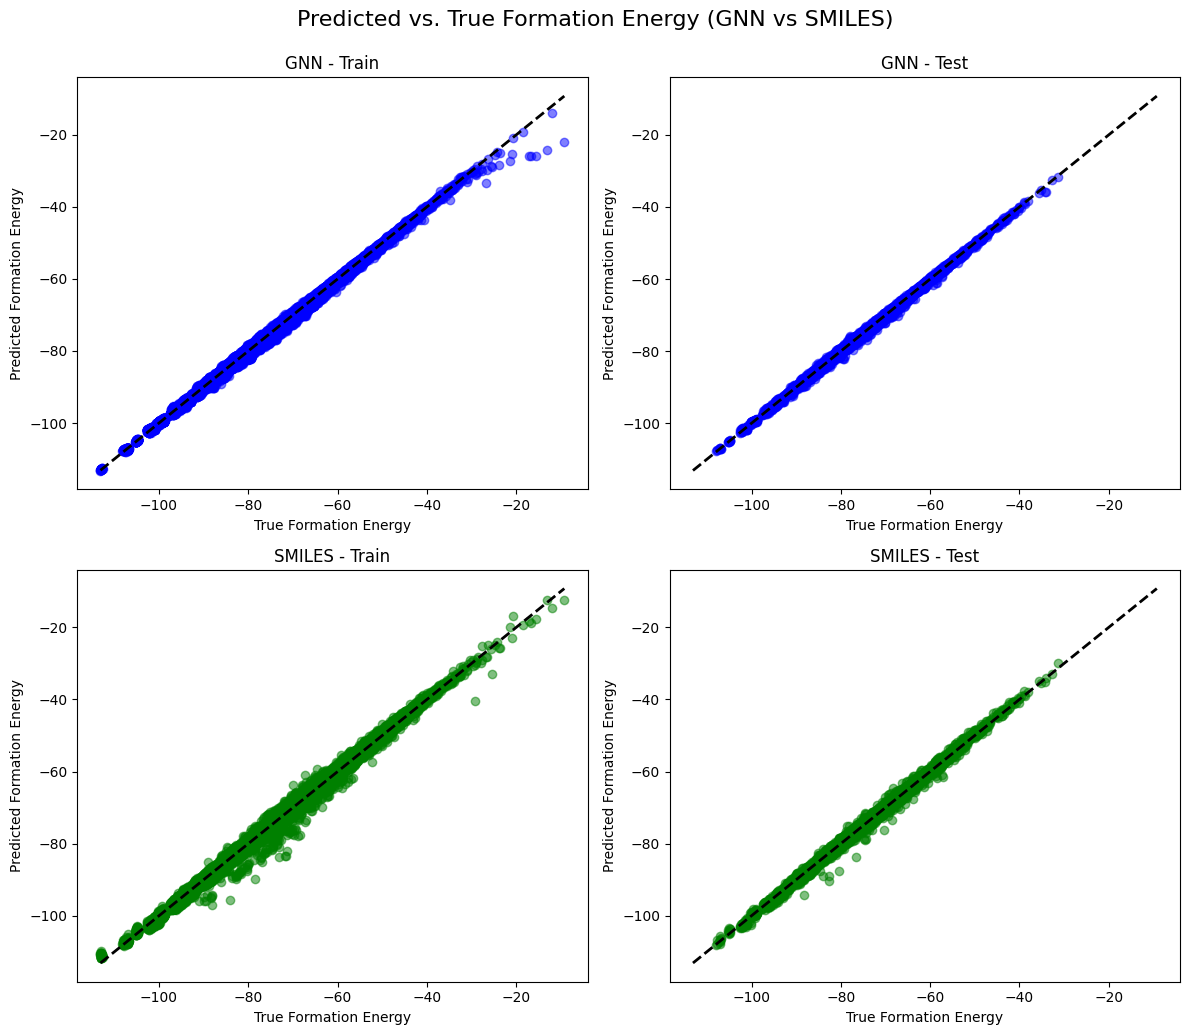

In [53]:
evaluate_and_plot_all(
    gnn_model, smiles_model,
    train_loader, test_loader,
    train_smiles_loader, test_smiles_loader,
    mu, std, device
)

## Task 2

In [44]:
def task2():

    '-----------------------------data-processing-----------------------------'
    with open('data/pos_data.pkl', 'rb') as f:
        pos_data = pickle.load(f)
    with open('data/type_data.pkl', 'rb') as f:
        type_data = pickle.load(f)
    with open('data/smiles.pkl', 'rb') as f:
        smiles_data = pickle.load(f)

    data_split = np.load('data/data_split.npz')
    train_idxes = data_split['train_idx']
    test_idxes = data_split['test_idx']
    formation_energy = np.load('data/formation_energy.npz')
    fe = formation_energy['y']
    mu = formation_energy['mu']
    std = formation_energy['sigma']

    subset_size = 10000

    '-----------------------------geometric-model-----------------------------'
    dataset = MolecularDataset(pos_data, type_data, fe)
    train_dataset = [dataset.get(i) for i in train_idxes[:subset_size]]
    test_dataset = [dataset.get(i) for i in test_idxes]

    batch_size = 64
    train_loader = torch_geometric.loader.DataLoader(train_dataset, 
                                                     batch_size=batch_size, 
                                                     shuffle=True)
    test_loader = torch_geometric.loader.DataLoader(test_dataset, 
                                                    batch_size=batch_size)

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(device)

    model = FormationEnergyGNN(node_feat_dim=16, hidden_dim=64, num_layers=3).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    mu_tensor = torch.tensor(mu, dtype=torch.float32).to(device)
    std_tensor = torch.tensor(std, dtype=torch.float32).to(device)

    flag_GNN = True
    GNN_trainer(model, 
                (train_loader, test_loader), 
                optimizer, 
                mu_tensor,
                std_tensor, 
                device,
                checkpoint_dir= f"checkpoints_GNN_s{subset_size}",
                train=flag_GNN) 
    

    '-----------------------------SMILES-model-----------------------------'
    smiles_dataset = SMILESDataset(smiles_data, fe)
    train_smiles = [smiles_dataset[i] for i in train_idxes[:subset_size]]
    test_smiles = [smiles_dataset[i] for i in test_idxes]

    batch_size = 64
    train_smiles_loader = DataLoader(train_smiles, batch_size=batch_size, 
                                     shuffle=True, collate_fn=collate_fn)
    test_smiles_loader = DataLoader(test_smiles, batch_size=batch_size, 
                                    collate_fn=collate_fn)

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}")

    smiles_model = SMILESRegressor(smiles_dataset.vocab_size).to(device)
    smiles_optimizer = torch.optim.Adam(smiles_model.parameters(), lr=0.001)
    mu_tensor = torch.tensor(mu, dtype=torch.float32).to(device)
    std_tensor = torch.tensor(std, dtype=torch.float32).to(device)

    flag_smiles = True
    SMILES_trainer(smiles_model, 
               train_smiles_loader, 
               test_smiles_loader, 
               smiles_optimizer, 
               mu_tensor, 
               std_tensor, 
               device,
               checkpoint_dir= f"checkpoints_SMILES_s{subset_size}",
               train=flag_smiles)
    

if __name__ == '__main__':
    print("Running Task 2...")
    task2()
    print("Task 2 completed successfully.")

Running Task 2...
cuda


C:\Users\gabri\AppData\Local\Temp\ipykernel_4824\2728428610.py:197: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mu_tensor = torch.tensor(mu, dtype=torch.float32).to(device)
C:\Users\gabri\AppData\Local\Temp\ipykernel_4824\2728428610.py:198: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  std_tensor = torch.tensor(std, dtype=torch.float32).to(device)



GNN Model - Epoch: 001
Train MSE: 42.8774 | Train MAE: 4.5456 | MAPE: 6.51% | RelErr: 6.17% | Acc(5%): 58.66% | R2: 0.6007
Test  MSE: 22.4499 | Test MAE: 2.9747 | MAPE: 4.35% | RelErr: 4.11% | Acc(5%): 79.29% | R2: 0.7887
--------------------------------------------------------------------------------

GNN Model - Epoch: 002
Train MSE: 24.1991 | Train MAE: 3.2658 | MAPE: 4.72% | RelErr: 4.49% | Acc(5%): 73.94% | R2: 0.7746
Test  MSE: 24.5555 | Test MAE: 4.0764 | MAPE: 5.62% | RelErr: 5.52% | Acc(5%): 53.78% | R2: 0.7658
--------------------------------------------------------------------------------

GNN Model - Epoch: 003
Train MSE: 22.9443 | Train MAE: 3.0939 | MAPE: 4.51% | RelErr: 4.27% | Acc(5%): 76.94% | R2: 0.7877
Test  MSE: 21.1548 | Test MAE: 2.5698 | MAPE: 3.83% | RelErr: 3.57% | Acc(5%): 82.39% | R2: 0.8013
--------------------------------------------------------------------------------

GNN Model - Epoch: 004
Train MSE: 22.2374 | Train MAE: 3.0828 | MAPE: 4.47% | RelErr: 4

C:\Users\gabri\AppData\Local\Temp\ipykernel_4824\2728428610.py:375: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mu_tensor = torch.tensor(mu, dtype=torch.float32).to(device)
C:\Users\gabri\AppData\Local\Temp\ipykernel_4824\2728428610.py:376: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  std_tensor = torch.tensor(std, dtype=torch.float32).to(device)


Using device: cuda


Epoch 1: 100%|██████████| 157/157 [00:01<00:00, 147.91it/s]



SMILES Model - Epoch: 001
Train MSE: 43.5763 | Train MAE: 4.8918 | MAPE: 6.82% | RelErr: 6.60% | Acc(5%): 50.53% | R2: 0.5882
Test  MSE: 20.3259 | Test MAE: 3.2720 | MAPE: 4.71% | RelErr: 4.54% | Acc(5%): 70.48% | R2: 0.8065
--------------------------------------------------------------------------------


Epoch 2: 100%|██████████| 157/157 [00:00<00:00, 172.59it/s]



SMILES Model - Epoch: 002
Train MSE: 20.3058 | Train MAE: 3.3487 | MAPE: 4.66% | RelErr: 4.57% | Acc(5%): 66.84% | R2: 0.8045
Test  MSE: 19.8132 | Test MAE: 3.2983 | MAPE: 4.64% | RelErr: 4.52% | Acc(5%): 68.70% | R2: 0.8085
--------------------------------------------------------------------------------


Epoch 3: 100%|██████████| 157/157 [00:00<00:00, 174.11it/s]



SMILES Model - Epoch: 003
Train MSE: 17.7284 | Train MAE: 3.1230 | MAPE: 4.35% | RelErr: 4.27% | Acc(5%): 69.34% | R2: 0.8256
Test  MSE: 28.7962 | Test MAE: 4.3841 | MAPE: 5.68% | RelErr: 5.78% | Acc(5%): 49.42% | R2: 0.7136
--------------------------------------------------------------------------------


Epoch 4: 100%|██████████| 157/157 [00:00<00:00, 185.00it/s]



SMILES Model - Epoch: 004
Train MSE: 17.2531 | Train MAE: 3.1349 | MAPE: 4.33% | RelErr: 4.26% | Acc(5%): 68.70% | R2: 0.8339
Test  MSE: 12.1146 | Test MAE: 2.4510 | MAPE: 3.46% | RelErr: 3.39% | Acc(5%): 78.07% | R2: 0.8791
--------------------------------------------------------------------------------


Epoch 5: 100%|██████████| 157/157 [00:00<00:00, 190.91it/s]



SMILES Model - Epoch: 005
Train MSE: 14.9904 | Train MAE: 2.8932 | MAPE: 4.02% | RelErr: 3.95% | Acc(5%): 73.24% | R2: 0.8564
Test  MSE: 13.5407 | Test MAE: 2.7067 | MAPE: 3.83% | RelErr: 3.71% | Acc(5%): 75.79% | R2: 0.8663
--------------------------------------------------------------------------------


Epoch 6: 100%|██████████| 157/157 [00:00<00:00, 173.25it/s]



SMILES Model - Epoch: 006
Train MSE: 16.7799 | Train MAE: 3.0535 | MAPE: 4.25% | RelErr: 4.18% | Acc(5%): 70.08% | R2: 0.8387
Test  MSE: 12.7446 | Test MAE: 2.7644 | MAPE: 3.76% | RelErr: 3.78% | Acc(5%): 75.59% | R2: 0.8670
--------------------------------------------------------------------------------


Epoch 7: 100%|██████████| 157/157 [00:00<00:00, 185.65it/s]



SMILES Model - Epoch: 007
Train MSE: 13.2072 | Train MAE: 2.6816 | MAPE: 3.72% | RelErr: 3.67% | Acc(5%): 76.06% | R2: 0.8710
Test  MSE: 14.8652 | Test MAE: 2.7301 | MAPE: 4.01% | RelErr: 3.85% | Acc(5%): 74.03% | R2: 0.8568
--------------------------------------------------------------------------------


Epoch 8: 100%|██████████| 157/157 [00:00<00:00, 191.37it/s]



SMILES Model - Epoch: 008
Train MSE: 13.4127 | Train MAE: 2.7041 | MAPE: 3.75% | RelErr: 3.70% | Acc(5%): 75.73% | R2: 0.8732
Test  MSE: 15.2900 | Test MAE: 3.0073 | MAPE: 4.12% | RelErr: 4.02% | Acc(5%): 73.07% | R2: 0.8483
--------------------------------------------------------------------------------


Epoch 9: 100%|██████████| 157/157 [00:00<00:00, 172.31it/s]



SMILES Model - Epoch: 009
Train MSE: 14.4087 | Train MAE: 2.8485 | MAPE: 3.93% | RelErr: 3.88% | Acc(5%): 74.14% | R2: 0.8548
Test  MSE: 13.6062 | Test MAE: 2.6590 | MAPE: 3.68% | RelErr: 3.57% | Acc(5%): 78.67% | R2: 0.8676
--------------------------------------------------------------------------------


Epoch 10: 100%|██████████| 157/157 [00:00<00:00, 188.41it/s]



SMILES Model - Epoch: 010
Train MSE: 16.1428 | Train MAE: 2.9986 | MAPE: 4.12% | RelErr: 4.07% | Acc(5%): 71.83% | R2: 0.8466
Test  MSE: 18.1063 | Test MAE: 3.6509 | MAPE: 4.87% | RelErr: 4.96% | Acc(5%): 60.77% | R2: 0.8146
--------------------------------------------------------------------------------
Task 2 completed successfully.


### PLOT FUNCTION FOR 9a

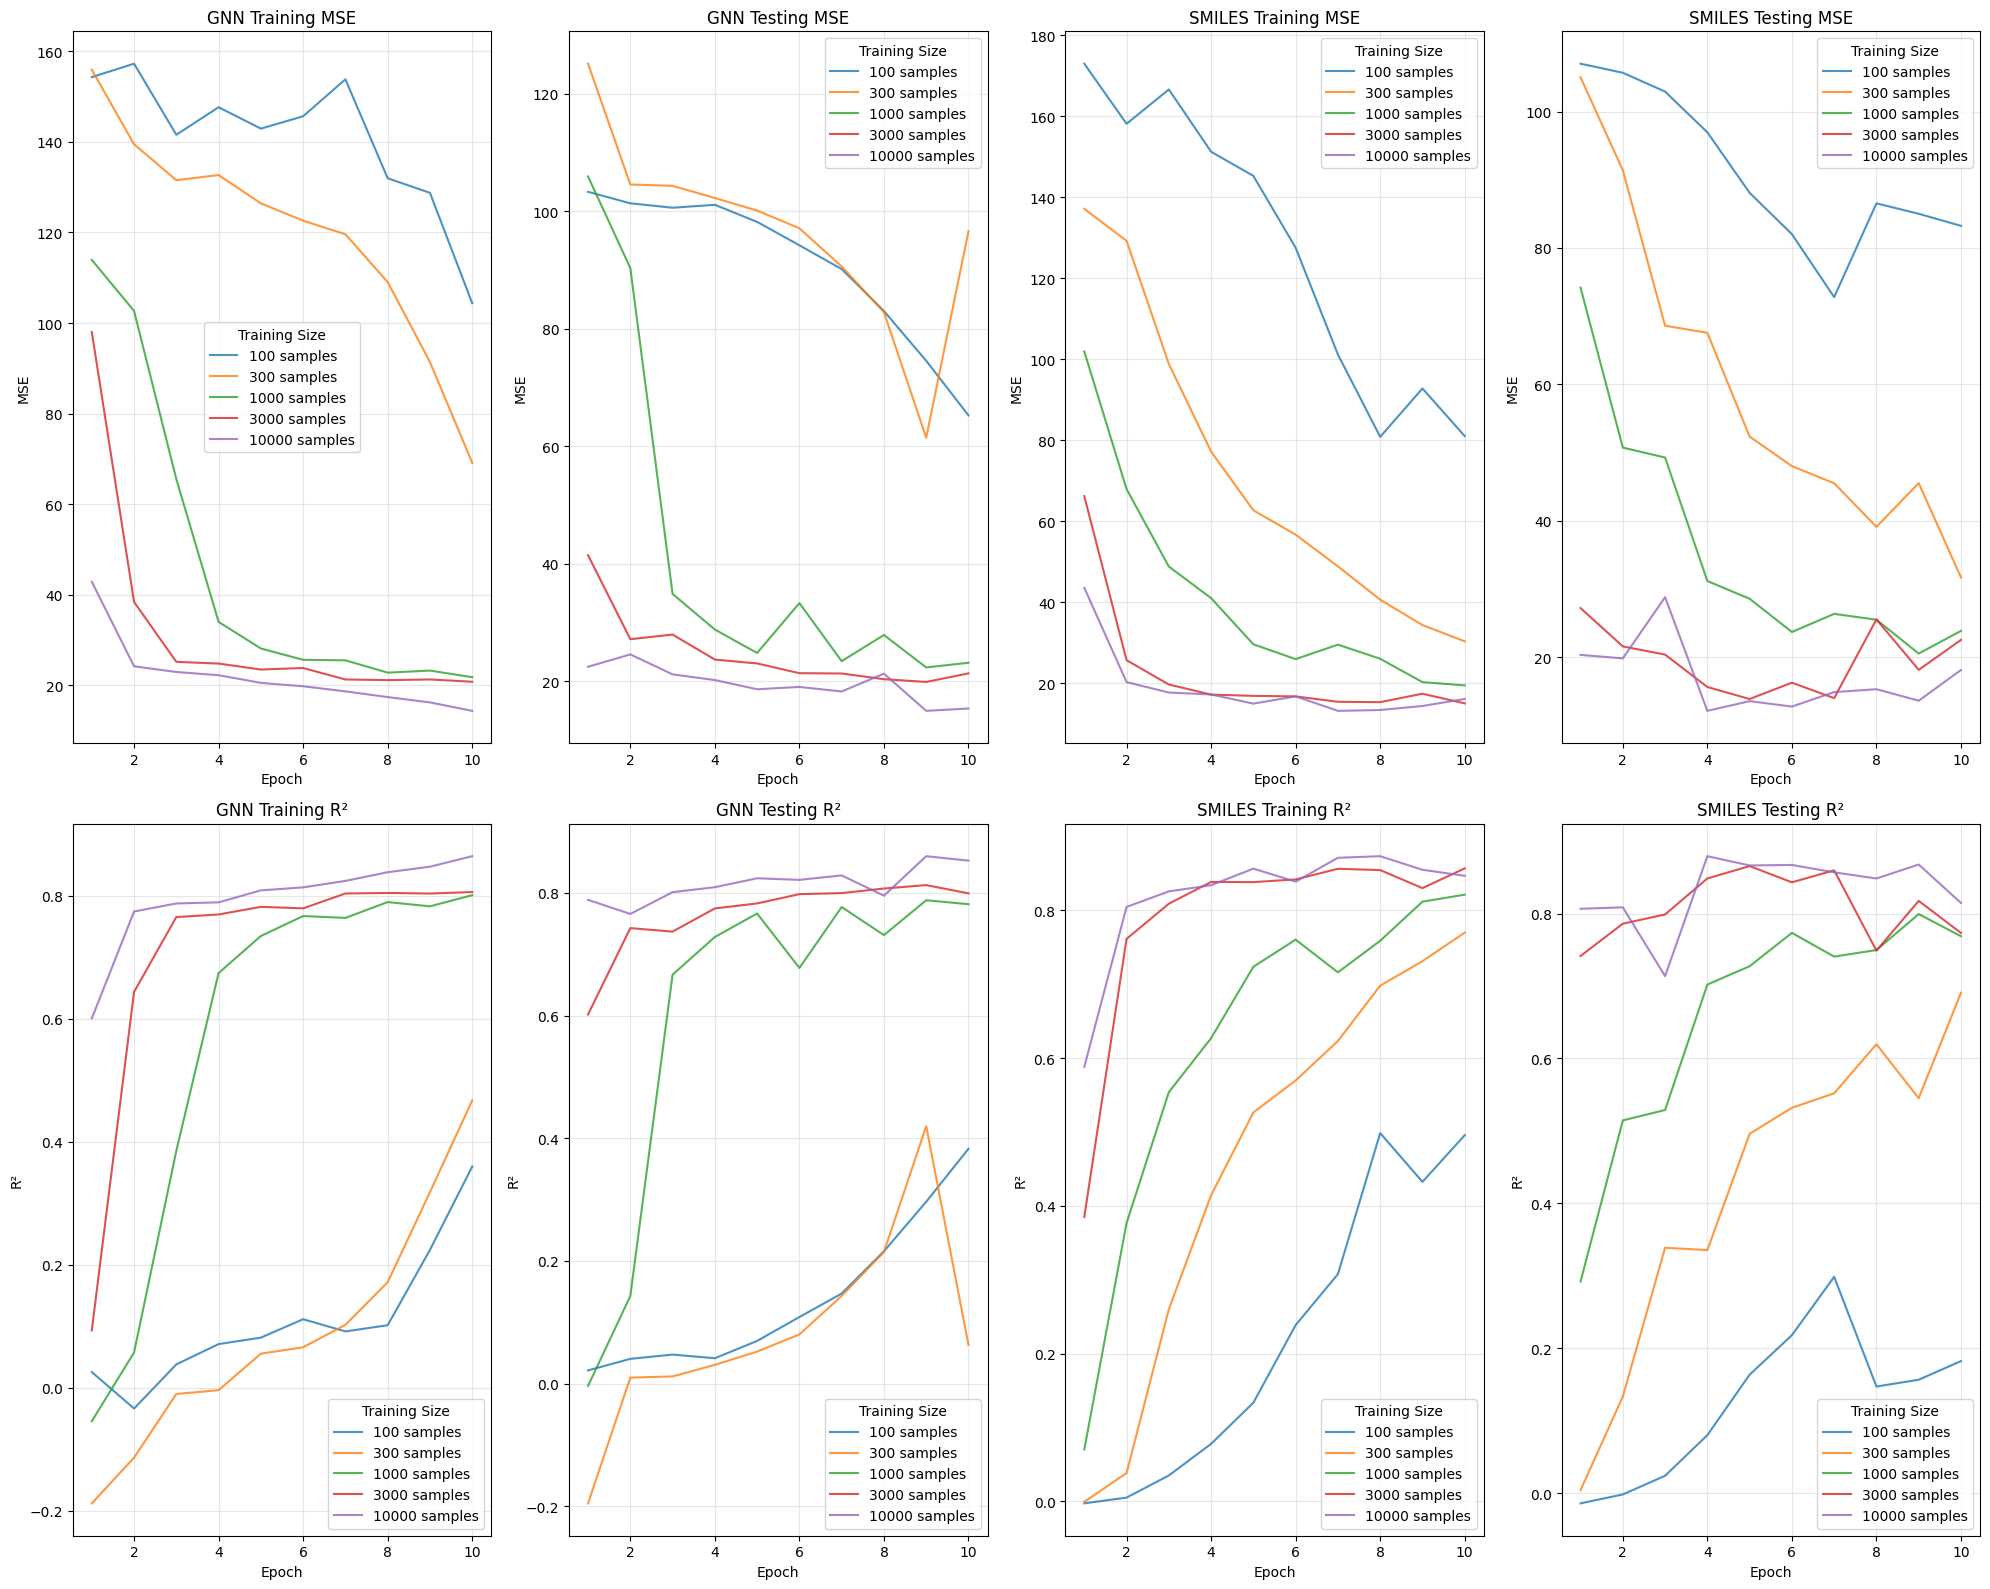

In [ ]:
import os
import pickle
import matplotlib.pyplot as plt
import numpy as np

def load_metrics(base_dir="."):
    """Load all metrics files from the directory structure"""
    gnn_metrics = {}
    smiles_metrics = {}
    

    for dirname in os.listdir(base_dir):
        if dirname.startswith("checkpoints_GNN_s"):
            size = int(dirname.split("_s")[1])
            metrics_file = os.path.join(base_dir, dirname, "GNN_metrics_history.pkl")
            if os.path.exists(metrics_file):
                with open(metrics_file, 'rb') as f:
                    gnn_metrics[size] = pickle.load(f)
    

    for dirname in os.listdir(base_dir):
        if dirname.startswith("checkpoints_SMILES_s"):
            size = int(dirname.split("_s")[1])
            metrics_file = os.path.join(base_dir, dirname, "SMILES_metrics_history.pkl")
            if os.path.exists(metrics_file):
                with open(metrics_file, 'rb') as f:
                    smiles_metrics[size] = pickle.load(f)
    
    return gnn_metrics, smiles_metrics

def plot_metrics(gnn_metrics, smiles_metrics):
    plt.figure(figsize=(20, 16))
    gnn_sizes = sorted(gnn_metrics.keys())
    smiles_sizes = sorted(smiles_metrics.keys())
    
    # ====================== MSE PLOTS ======================
    plt.subplot(2, 4, 1)
    for size in gnn_sizes:
        metrics = gnn_metrics[size]
        epochs = range(1, len(metrics['train_mse']) + 1)
        plt.plot(epochs, metrics['train_mse'], label=f'{size} samples', alpha=0.8)
    plt.title('GNN Training MSE')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend(title="Training Size")
    plt.grid(True, alpha=0.3)
    

    plt.subplot(2, 4, 2)
    for size in gnn_sizes:
        metrics = gnn_metrics[size]
        epochs = range(1, len(metrics['test_mse']) + 1)
        plt.plot(epochs, metrics['test_mse'], label=f'{size} samples', alpha=0.8)
    plt.title('GNN Testing MSE')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend(title="Training Size")
    plt.grid(True, alpha=0.3)
    

    plt.subplot(2, 4, 3)
    for size in smiles_sizes:
        metrics = smiles_metrics[size]
        epochs = range(1, len(metrics['train_mse']) + 1)
        plt.plot(epochs, metrics['train_mse'], label=f'{size} samples', alpha=0.8)
    plt.title('SMILES Training MSE')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend(title="Training Size")
    plt.grid(True, alpha=0.3)
    

    plt.subplot(2, 4, 4)
    for size in smiles_sizes:
        metrics = smiles_metrics[size]
        epochs = range(1, len(metrics['test_mse']) + 1)
        plt.plot(epochs, metrics['test_mse'], label=f'{size} samples', alpha=0.8)
    plt.title('SMILES Testing MSE')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend(title="Training Size")
    plt.grid(True, alpha=0.3)
    
    # ====================== R² PLOTS ======================
    plt.subplot(2, 4, 5)
    for size in gnn_sizes:
        metrics = gnn_metrics[size]
        epochs = range(1, len(metrics['train_r2']) + 1)
        plt.plot(epochs, metrics['train_r2'], label=f'{size} samples', alpha=0.8)
    plt.title('GNN Training R²')
    plt.xlabel('Epoch')
    plt.ylabel('R²')
    plt.legend(title="Training Size")
    plt.grid(True, alpha=0.3)


    plt.subplot(2, 4, 6)
    for size in gnn_sizes:
        metrics = gnn_metrics[size]
        epochs = range(1, len(metrics['test_r2']) + 1)
        plt.plot(epochs, metrics['test_r2'], label=f'{size} samples', alpha=0.8)
    plt.title('GNN Testing R²')
    plt.xlabel('Epoch')
    plt.ylabel('R²')
    plt.legend(title="Training Size")
    plt.grid(True, alpha=0.3)
    

    plt.subplot(2, 4, 7)
    for size in smiles_sizes:
        metrics = smiles_metrics[size]
        epochs = range(1, len(metrics['train_r2']) + 1)
        plt.plot(epochs, metrics['train_r2'], label=f'{size} samples', alpha=0.8)
    plt.title('SMILES Training R²')
    plt.xlabel('Epoch')
    plt.ylabel('R²')
    plt.legend(title="Training Size")
    plt.grid(True, alpha=0.3)
    

    plt.subplot(2, 4, 8)
    for size in smiles_sizes:
        metrics = smiles_metrics[size]
        epochs = range(1, len(metrics['test_r2']) + 1)
        plt.plot(epochs, metrics['test_r2'], label=f'{size} samples', alpha=0.8)
    plt.title('SMILES Testing R²')
    plt.xlabel('Epoch')
    plt.ylabel('R²')
    plt.legend(title="Training Size")
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('training_size_comparison_with_R2.png', dpi=300, bbox_inches='tight')
    plt.show()

def main():
    gnn_metrics, smiles_metrics = load_metrics()
    plot_metrics(gnn_metrics, smiles_metrics)

if __name__ == '__main__':
    main()

## Task 3

In [11]:
def is_valid_smiles(smiles):
    if smiles is None:
        return False
    try:
        mol = Chem.MolFromSmiles(smiles)
        return mol is not None
    except:
        return False

def canonicalize(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            return Chem.MolToSmiles(mol, canonical=True)
        return 'None'
    except:
        return 'None'

In [12]:
canonicalize("COO"), canonicalize("O(C)O")

('COO', 'COO')

In [13]:
is_valid_smiles("COO"), is_valid_smiles("O(C)O"), is_valid_smiles("C##")

(True, True, False)

In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence
import random
import numpy as np
from rdkit import Chem
from tqdm import tqdm
import matplotlib.pyplot as plt

In [ ]:
# ------------------------ Data Preparation ------------------------
class SMILESLanguageDataset(Dataset):
    def __init__(self, smiles_list):
        self.smiles = smiles_list
        self.char2idx = {'<pad>': 0, '<s>': 1, '</s>': 2, '<unk>': 3}
        self.idx2char = {0: '<pad>', 1: '<s>', 2: '</s>', 3: '<unk>'}
        
        chars = set(c for smile in self.smiles for c in smile)
        for i, c in enumerate(sorted(chars), start=4):
            self.char2idx[c] = i
            self.idx2char[i] = c
            
        self.vocab_size = len(self.char2idx)
        self.encoded = [self.encode(smile) for smile in self.smiles]

    def encode(self, smile):
        return [self.char2idx['<s>']] + [self.char2idx.get(c, 3) for c in smile] + [self.char2idx['</s>']]

    def decode(self, token_ids):
        chars = []
        for idx in token_ids:
            if idx == self.char2idx['</s>']:
                break
            if idx in self.idx2char and idx > 3:
                chars.append(self.idx2char[idx])
        return ''.join(chars)

    def __len__(self):
        return len(self.encoded)

    def __getitem__(self, idx):
        seq = torch.tensor(self.encoded[idx], dtype=torch.long)
        return seq[:-1], seq[1:]

def collate_lm(batch):
    inputs, targets = zip(*batch)
    inputs_padded = pad_sequence(inputs, batch_first=True, padding_value=0)
    targets_padded = pad_sequence(targets, batch_first=True, padding_value=0)
    return inputs_padded, targets_padded


class SMILESLanguageModelEnhanced(nn.Module):
    def __init__(self, vocab_size, embed_dim=128, hidden_dim=256, num_layers=2, dropout=0.3):
        super().__init__()
        self.embed = nn.Embedding(vocab_size, embed_dim, padding_idx=0) 
        self.lstm = nn.LSTM(embed_dim, hidden_dim, num_layers, batch_first=True, dropout=dropout if num_layers > 1 else 0.0)
        self.hidden_to_intermediate = nn.Linear(hidden_dim, hidden_dim)
        self.dropout = nn.Dropout(dropout)
        self.output_layer = nn.Linear(hidden_dim, vocab_size)

    def forward(self, x, hidden=None):
        x = self.embed(x)
        lstm_out, hidden = self.lstm(x, hidden)
        inter = self.dropout(F.relu(self.hidden_to_intermediate(lstm_out)))
        logits = self.output_layer(inter)
        
        return logits, hidden
    
# ------------------------ Training Function ------------------------
def train_smiles_generator(model, dataset, device, epochs=10, batch_size=64, lr=1e-3):
    loader = DataLoader(dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_lm)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    model.to(device)

    for epoch in range(1, epochs + 1):
        model.train()
        total_loss = 0
        for x, y in tqdm(loader, desc=f"Epoch {epoch}"):
            x, y = x.to(device), y.to(device)
            logits, _ = model(x)
            loss = F.cross_entropy(logits.view(-1, logits.size(-1)), y.view(-1), ignore_index=0)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch} Loss: {total_loss / len(loader):.4f}")
    return model

# ------------------------ Generation Function ------------------------
def sample_smiles(model, dataset, device, max_len=100, n_samples=5000, temperature=1.0):
    model.eval()
    results = []
    with torch.no_grad():
        for _ in tqdm(range(n_samples), desc="Generating SMILES"):
            input_seq = torch.tensor([[dataset.char2idx['<s>']]], dtype=torch.long).to(device)
            hidden = None
            generated = []

            for _ in range(max_len):
                logits, hidden = model(input_seq, hidden)
                logits = logits[:, -1, :] / temperature
                probs = F.softmax(logits, dim=-1)
                next_token = torch.multinomial(probs, num_samples=1)
                token_id = next_token.item()

                if token_id == dataset.char2idx['</s>']:
                    break
                generated.append(token_id)
                input_seq = next_token

            smiles = dataset.decode(generated)
            results.append(smiles)
    return results

# ------------------------ Evaluation ------------------------
def evaluate_generated_smiles(generated, training_set):
    canon_smiles = []
    for smi in generated:
        if is_valid_smiles(smi):
            canon = canonicalize(smi)
            if canon != 'None':
                canon_smiles.append(canon)

    canon_set = set(canon_smiles)
    unique = len(canon_set)
    novel = len([s for s in canon_set if s not in training_set])

    total = len(generated)
    return {
        "validity (%)": len(canon_smiles) / total * 100,
        "uniqueness (%)": unique / len(canon_smiles) * 100 if canon_smiles else 0,
        "novelty (%)": novel / unique * 100 if unique else 0
    }

In [ ]:
# ----------------------------- Main Task -----------------------------
def task3():
    print("Starting Task 3: SMILES Generation")

    # Load data
    with open('data/smiles.pkl', 'rb') as f:
        smiles_data = pickle.load(f)
    data_split = np.load('data/data_split.npz')
    train_idxes = data_split['train_idx']
    train_smiles = [smiles_data[i] for i in train_idxes]


    dataset = SMILESLanguageDataset(train_smiles)
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}")

    model = SMILESLanguageModelEnhanced(dataset.vocab_size)
    model = train_smiles_generator(model, dataset, device, epochs=10)
    generated_smiles = sample_smiles(model, dataset, device, n_samples=5000)

    metrics = evaluate_generated_smiles(generated_smiles, set(train_smiles))
    print("\n=== SMILES Generation Metrics ===")
    for k, v in metrics.items():
        print(f"{k}: {v:.2f}%")

    print("Task 3 completed successfully.")

if __name__ == '__main__':
    task3()

Starting Task 3: SMILES Generation
Using device: cuda


Epoch 1: 100%|██████████| 1860/1860 [00:19<00:00, 96.90it/s] 


Epoch 1 Loss: 0.7466


Epoch 2: 100%|██████████| 1860/1860 [00:19<00:00, 97.24it/s] 


Epoch 2 Loss: 0.5953


Epoch 3: 100%|██████████| 1860/1860 [00:19<00:00, 96.71it/s] 


Epoch 3 Loss: 0.5715


Epoch 4: 100%|██████████| 1860/1860 [00:19<00:00, 95.14it/s] 


Epoch 4 Loss: 0.5598


Epoch 5: 100%|██████████| 1860/1860 [00:18<00:00, 100.67it/s]


Epoch 5 Loss: 0.5524


Epoch 6: 100%|██████████| 1860/1860 [00:18<00:00, 101.01it/s]


Epoch 6 Loss: 0.5472


Epoch 7: 100%|██████████| 1860/1860 [00:18<00:00, 98.07it/s] 


Epoch 7 Loss: 0.5433


Epoch 8: 100%|██████████| 1860/1860 [00:17<00:00, 104.30it/s]


Epoch 8 Loss: 0.5398


Epoch 9: 100%|██████████| 1860/1860 [00:17<00:00, 103.44it/s]


Epoch 9 Loss: 0.5371


Epoch 10: 100%|██████████| 1860/1860 [00:18<00:00, 101.43it/s]


Epoch 10 Loss: 0.5348


Generating SMILES: 100%|██████████| 5000/5000 [01:46<00:00, 47.10it/s]



=== SMILES Generation Metrics ===
validity (%): 98.46%
uniqueness (%): 98.60%
novelty (%): 39.08%
Task 3 completed successfully.
